# Marketing Data Analysis

### Table of Contents
- [Background](#Background)
- [Goals](#Goals)
- [Loading the Data](#Loading_the_Data) 
    - [Description of the Data](#Description_of_the_Data)
- [Data Cleaning](#Data_Cleaning)
- [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    - [Initial Steps](#Initial_Steps)
    - [Income and Purchase Behavior](#Income)
    - [Education and Purchase Behavior](#Education)
    - [Age and Purchase Behavior](#Age)
- [Conclusion](#Conclusion)

### **Background**<a id='Background'></a>

This dataset was provided to students for their final projects in a course called Advanced Data Analytics as part of the Master of Science Business Analytics program at Hult International Business School for the AY 20/21.  It is from a food/beverage company including customer profiles, product preferences, campaign success measurement, and sales channel performance.

### **Goals**<a id='Goals'></a>

Using Python and its various libraries (Pandas, Numpy, Matplotlib, Seaborn), my objective is to complete the following:
- Get acquainted with the data
- Clean and prepare the data for analysis
- Develop questions
- Analyze variables to gain insights

### **Loading the Data**<a id='Loading_the_Data'></a>

The first step is to load the necessary libraries into the notebook that will allow me to import, view, manipulate and visualize the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("marketing_data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


**Description of the Data**<a id='Description_of_the_Data'></a>

While getting acquainted with the data, I noticed the following:
- The dataset has 2,240 records with 28 fields
- Most of the fields are of 'Integer' type
- The 'Income' field has 24 null values, an extra space in the field name and will require conversion to datatype 'float'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### **Data Cleaning**<a id='Data_Cleaning'></a>

**1)** The only field that requires cleaning is the 'Income' field, so I will perform the following:
- Remove space from field name
- Remove dollar sign from field values
- Convert to float type
- Remove null values and replace with Income mean values

Based on the mean and large max value in the Income column, I decided to plot the distribution to check for outliers. Luckily one was found, so I removed it and replotted the distribution. 

**2)** I will also add an 'Age' field based on the 'Year_Birth' variable.

**3)** Finally, I will combine a few of the 'Education' categories for simplicity. The categories are a bit ambiguous, and based off of the plotted income by education level I found it appropriate to group the 5 categories into 3 education levels: high school, college, and graduate degrees.

In [5]:
#Remove space
data = data.rename(columns={' Income ':'Income'})

#Remove dollar sign and comma
data.Income = data.Income.replace('[\$,]', '', regex=True)

#Convert to float type
data.Income = data['Income'].astype('float')

#Replace null values with Income mean values
data.Income = data['Income'].fillna(data['Income'].mean())

#See summary stats with Income field
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


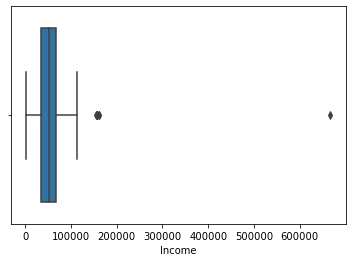

In [6]:
#Plot Income distribution
plt.figure()
sns.boxplot(x=data.Income)
plt.show()

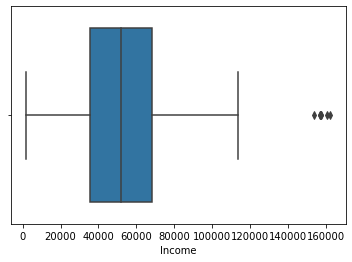

count      2239.000000
mean      51972.834762
std       21410.605416
min        1730.000000
25%       35533.500000
50%       51717.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

In [7]:
#Remove outlier
data = data[data['Income'] < 200000]

#Replot Income distribution
plt.figure()
sns.boxplot(x=data.Income)
plt.show()

#Show Income stats
data.Income.describe()

Despite a few remaining outliers, the Income field will be sufficient for analysis. 

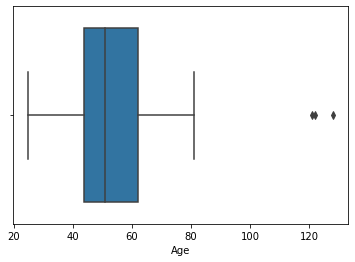

In [8]:
#Create 'Age' field
data['Age'] = 2021 - data['Year_Birth'] 

#Plot Age distribution to check for outliers
plt.figure()
sns.boxplot(x=data.Age)
plt.show()

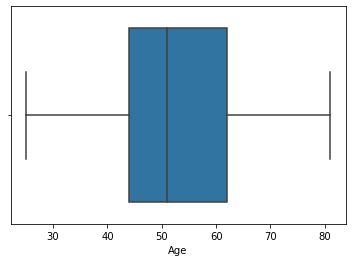

In [9]:
#filter outliers
data = data[data['Age'] < 100]

#Confirm age distribution is ready for analysis
plt.figure()
sns.boxplot(x=data.Age)
plt.show()

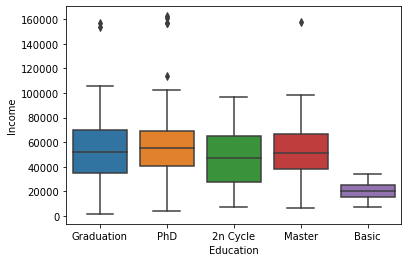

In [10]:
#Show value counts for each education category
data.Education.value_counts()

#Plot education with income to determine grouping
plt.figure()
sns.boxplot(x=data.Education, y=data.Income)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Income'>

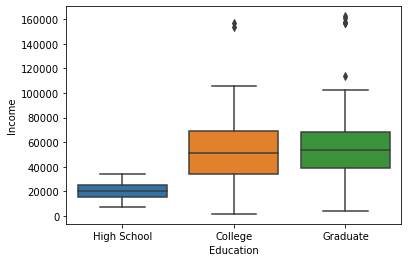

In [11]:
#Group education into 3 new categories
data['Education'] = data['Education'].replace({'Graduation': 'College', 'PhD': 'Graduate', 'Master': 'Graduate', '2n Cycle': 'College', 'Basic': 'High School'})

#Replot education with income
plt.figure()
sns.boxplot(x=data.Education, y=data.Income, order=['High School', 'College', 'Graduate'])

Based on the boxplot above, we can conclude that a college degree or higher correlates to a higher average income. The graduate degree income seems to have a smaller IQR than the college degree income, which would require further analysis to determine if they are statistically different. 

### **Exploratory Data Analysis**<a id='Exploratory_Data_Analysis'></a>

Now that the data is cleaned up, I will focus on the following independent variables in my analysis:

- `income`
- `education`
- `age`

The objective is to understand how income, education and age associate with the following dependent variables:

- `mnt_wines`
- `mnt_fruits`
- `mnt_meat_products`
- `mnt_fish_products`
- `mnt_sweet_products`
- `mnt_gold_products`
- `num_deals_purchases`
- `num_web_purchases`
- `num_catalog_purchases`
- `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:

Does a shopper's income, education level, and/or age relate to their purchasing behavior?

### **Initial Steps**<a id='Initial_Steps'></a>

In order to understand the dataset as a whole, I plotted histograms for each quantitative variable and found that they all have similar distributions that are skewed to the right. 

I also decided to plot these variables on a heat matrix, which shows income as having the most significant association with the dependent variables.

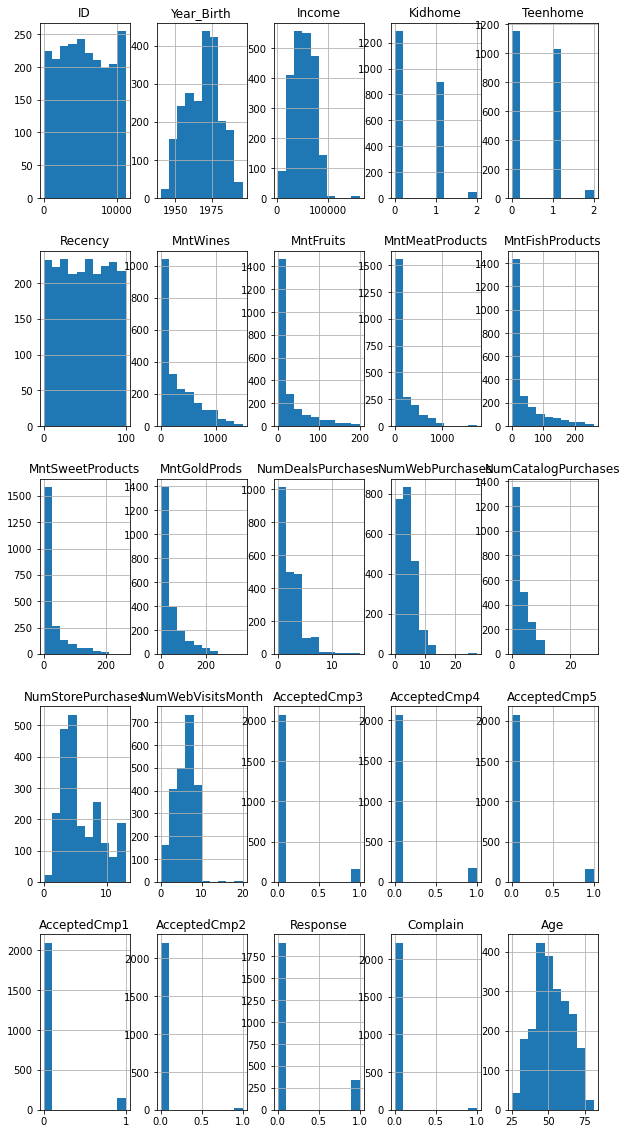

In [12]:
#Generate subplots
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
data.hist(ax=ax);

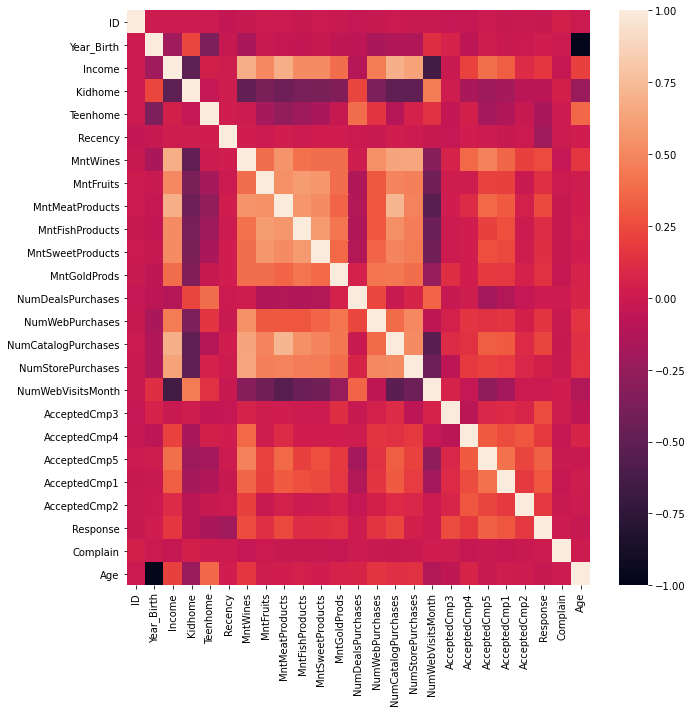

In [13]:
plt.figure(figsize=(10,10))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=data.corr(),annot=False)
plt.tight_layout()
plt.show()

### **Income and Purchase Behavior**<a id='Income'></a>

For this step I will generate scatterplots to visualize the association between Income and the 10 quantitative variables. Here I will use a for loop to iterate through the list of quantitative fields and plot each relationship on a scatterplot. 

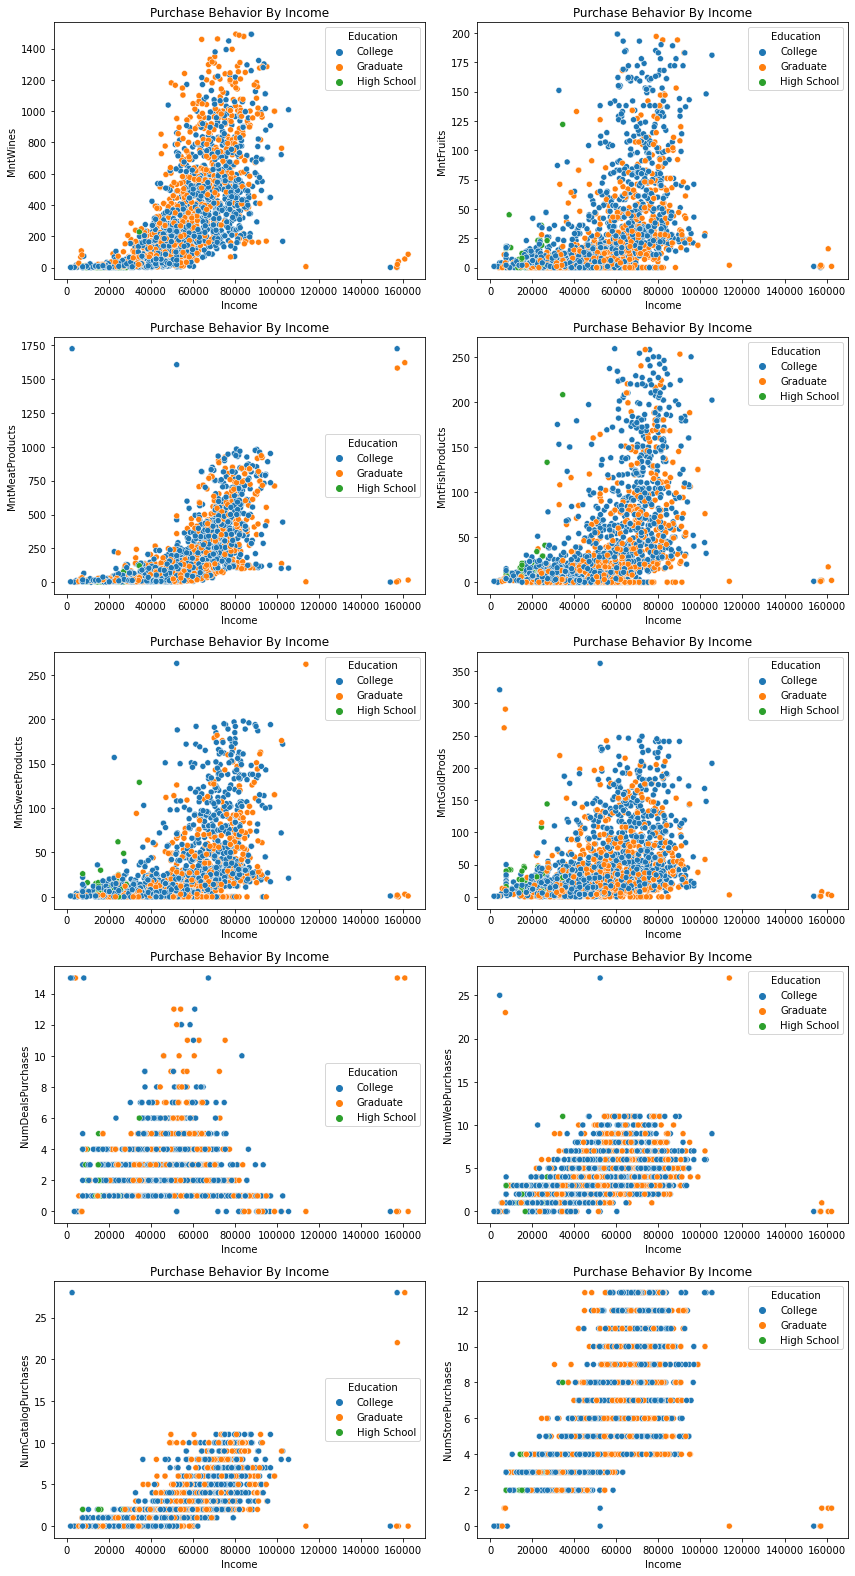

In [14]:
#List of dependent variables
dependent_vars_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
#Set plot count for subplots
plot = 0
fig = plt.figure(figsize=(12,22))
#For loop to plot each relationship
for i in range(len(dependent_vars_list)):
    plot += 1
    ax = plt.subplot(5,2,plot)
    sns.scatterplot(x=data.Income, y=data[dependent_vars_list[i]], hue=data.Education)
    plt.title('Purchase Behavior By Income')
plt.tight_layout()
plt.show()

Based on the above, we can conclude there is positive correlation between Income and the dependent variables, with the exception of NumDealsPurchases. It seems there could be a negative correlation here, which is confirmed by utilizing the Pearson Correlation Coefficient below. A coefficient of -0.107 reflects a weak negative correlation between Income and NumDealsPurchases. In other words, as income increases, shoppers are less likely to purchase discount items. 

It is difficult to see the how Education affects these purchases, so further analysis will be done below.

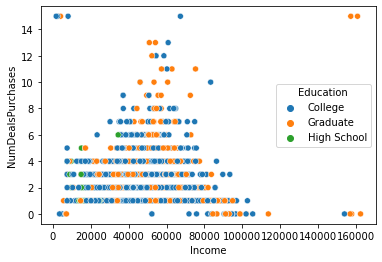

The Pearson Correlation Coefficient between Income and Number of Discount Purchases is -0.1, indicating a weak negative correlation.


In [15]:
#Replot Income against NumDealsPurchases
plt.figure()
sns.scatterplot(x=data.Income,y=data.NumDealsPurchases, hue=data.Education)
plt.show()

#Calculate correlation between Income and NumDealsPurchases
from scipy.stats import pearsonr
var,p = pearsonr(data.Income,data.NumDealsPurchases)
print('The Pearson Correlation Coefficient between Income and Number of Discount Purchases is {0:.1f}, indicating a weak negative correlation.'.format(var))

### **Education and Purchase Behavior**<a id='Education'></a>

In order to get a better idea of how Education is associated with purchase behavior, a similar visualization was done below using boxplots. 

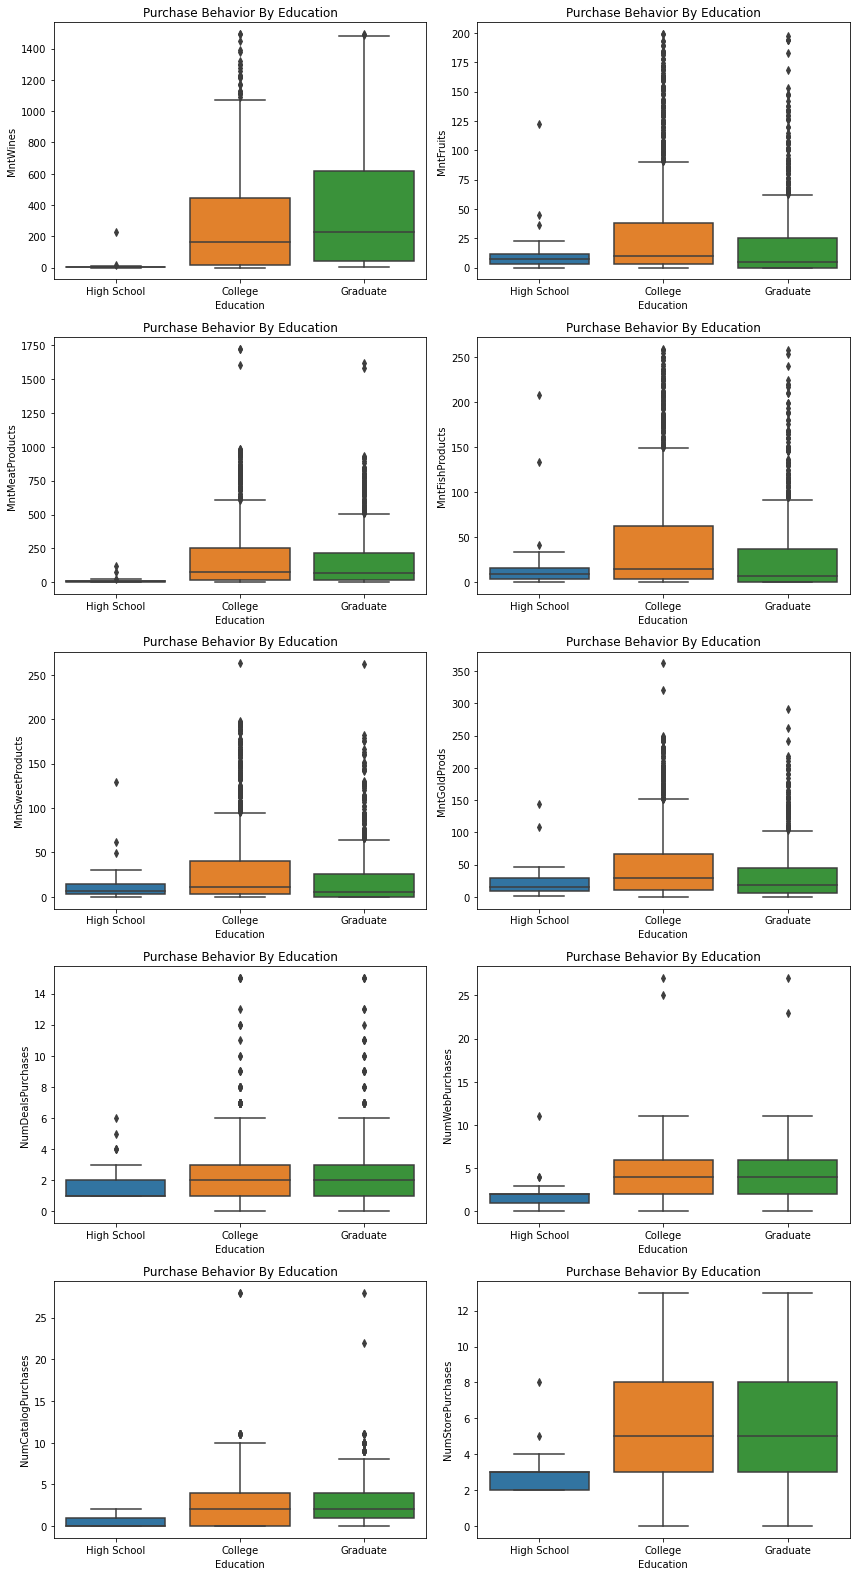

In [16]:
#List of dependent variables
dependent_vars_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
#Set plot count for subplots
plot = 0
fig = plt.figure(figsize=(12,22))
#For loop to plot each relationship
for i in range(len(dependent_vars_list)):
    plot += 1
    ax = plt.subplot(5,2,plot)
    sns.boxplot(x=data.Education, y=data[dependent_vars_list[i]], order=['High School', 'College', 'Graduate'])
    plt.title('Purchase Behavior By Education')
plt.tight_layout()
plt.show()

Based on the above, we can conclude that there are strong associations between education and purchasing meat as well as wine. Wine seems to be favored more by those with graduate degrees as indicated by the wider IQR compared to shoppers with college degrees. Shoppers with high school degrees seem to make very little if any purchases of wine or meat products, which could be due to the fact that meat and wine products are generally priced higher than other groceries.

There are also strong correlations between education and purchasing in-store and on the web. It seems that shoppers with high school degrees make less web and in-store purchases compared to those with higher education backgrounds. This is perhaps due to the longer working hours and having less income to purchase electronics to access and make purchases on the web.

### **Age and Purchase Behavior**<a id='Age'></a>

Again I will use a for loop to plot the associations between Age and the Purchase Behavior variables.

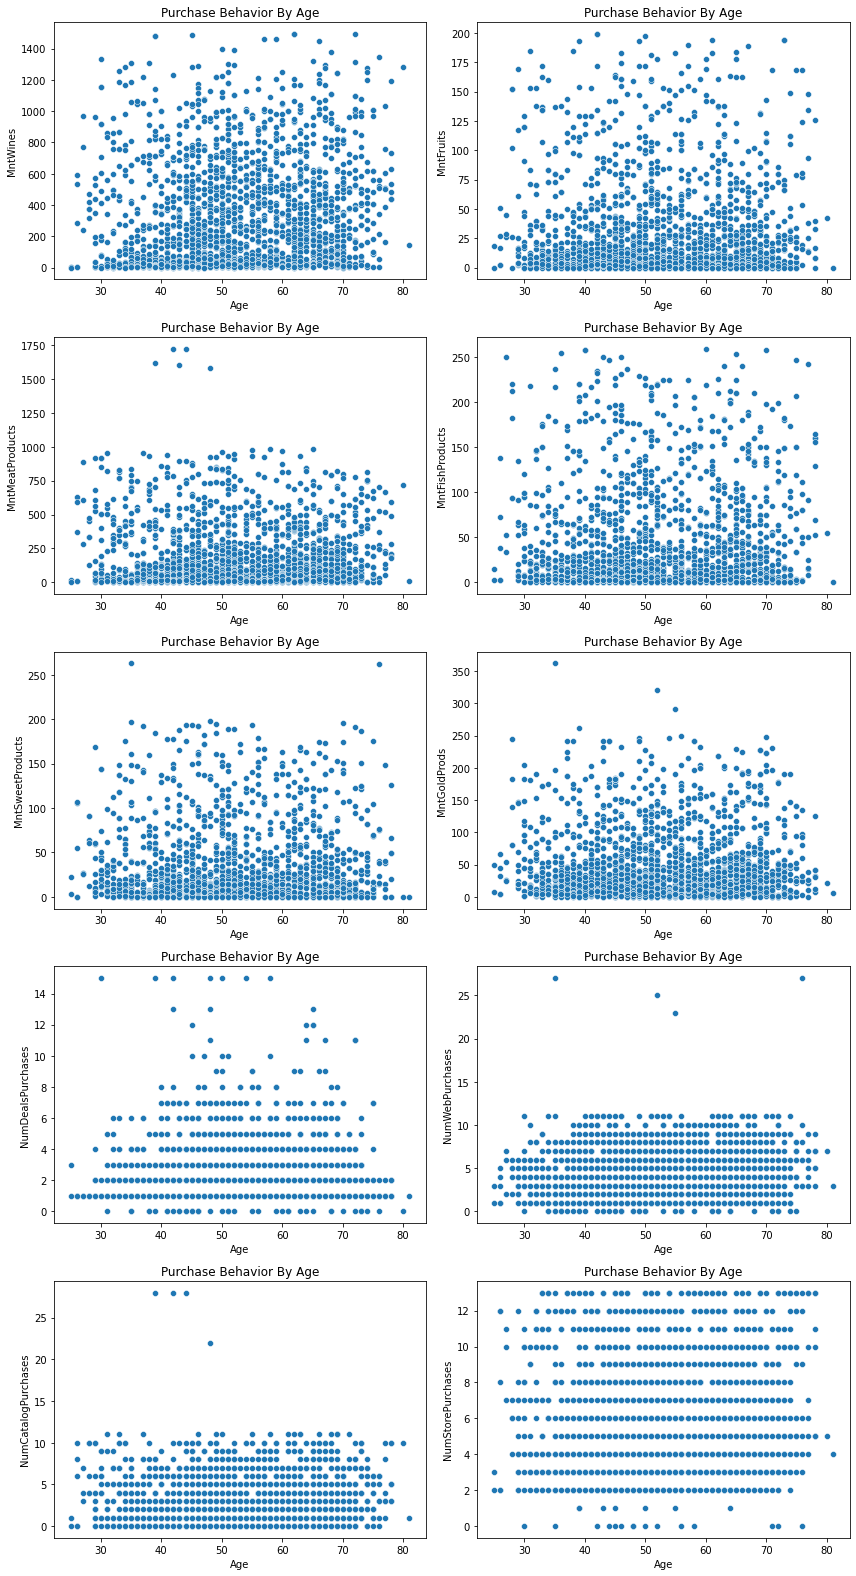

In [17]:
#List of dependent variables
dependent_vars_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
#Set plot count for subplots
plot = 0
fig = plt.figure(figsize=(12,22))
#For loop to plot each relationship
for i in range(len(dependent_vars_list)):
    plot += 1
    ax = plt.subplot(5,2,plot)
    sns.scatterplot(x=data.Age, y=data[dependent_vars_list[i]])
    plt.title('Purchase Behavior By Age')
plt.tight_layout()
plt.show()

Wow! It is very difficult to see any correlations when incorporating Age as the independent variable. I will proceed by creating a new field 'Age Groups' and replot the above to see if there are any visible assocations.

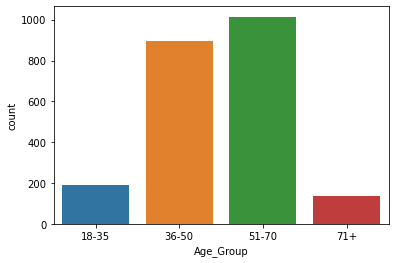

In [18]:
#Create Age Group Function
def age_group(age):
    if 18 <= age <= 35 : 
        return '18-35' 
    elif 35 < age <= 50 : 
        return '36-50'
    elif 50 < age <= 70 : 
        return '51-70'
    else : 
        return '71+'

#Create Age Group field
data['Age_Group'] = data['Age'].apply(age_group)

#Plot Age Group distribution
plt.figure()
sns.countplot(data.Age_Group,order=['18-35','36-50','51-70','71+'])
plt.show()

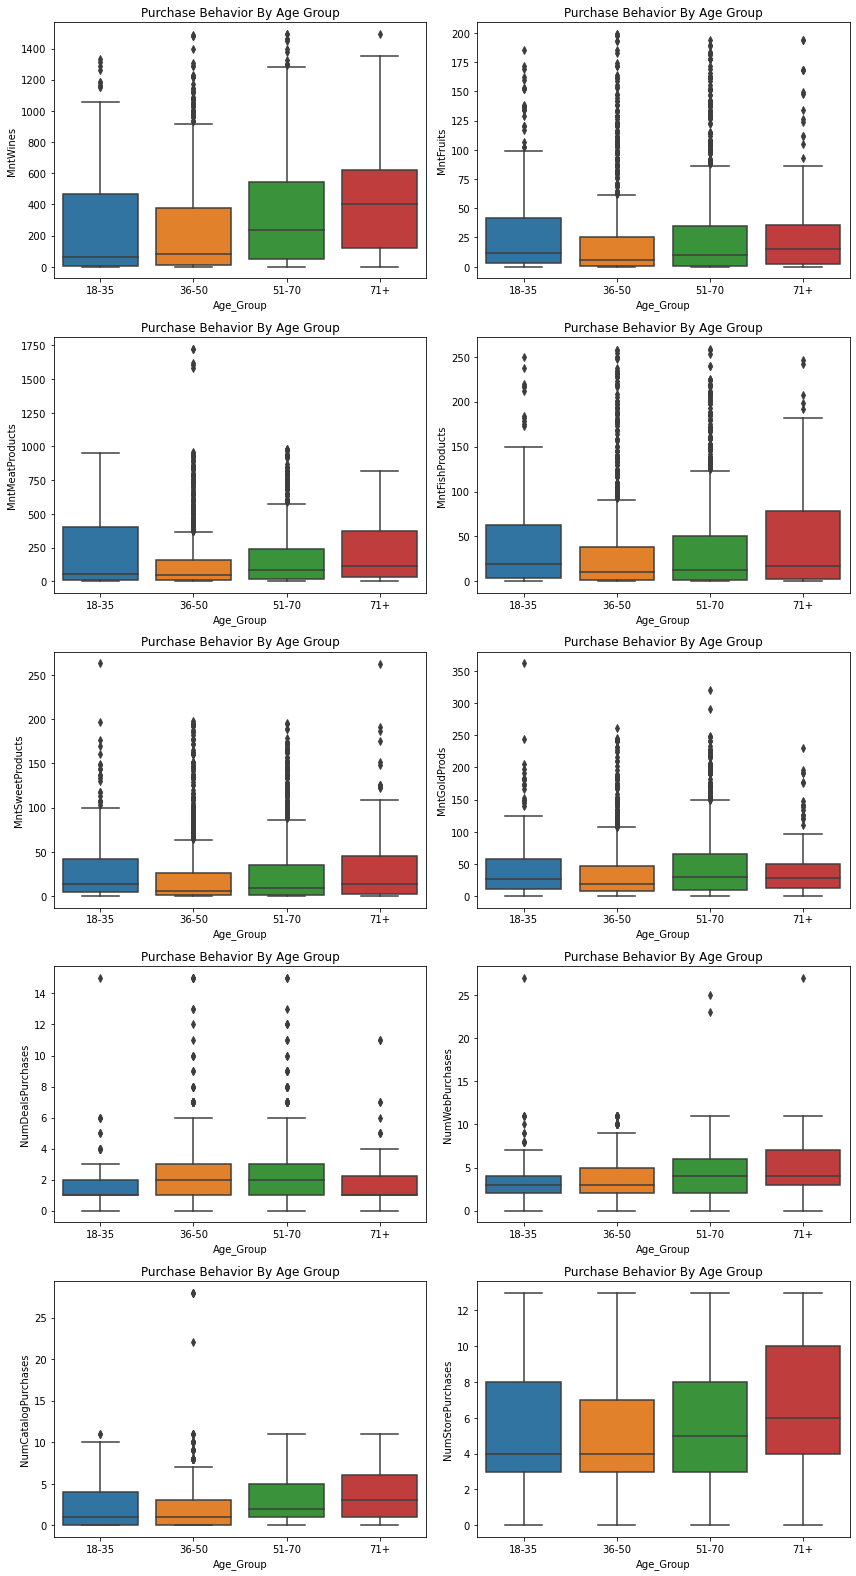

In [19]:
#List of dependent variables
dependent_vars_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
#Set plot count for subplots
plot = 0
fig = plt.figure(figsize=(12,22))
#For loop to plot each relationship
for i in range(len(dependent_vars_list)):
    plot += 1
    ax = plt.subplot(5,2,plot)
    sns.boxplot(x=data.Age_Group, y=data[dependent_vars_list[i]],order=['18-35','36-50','51-70','71+'])
    plt.title('Purchase Behavior By Age Group')
plt.tight_layout()
plt.show()

With the new Age Group variable, we can finally see some insights:
- Age Group does not seem to affect the type of products that a shopper purchases
- Wine is the most popular product among all age groups
- Age groups (18-35] and (71+] are less likely to seek out shopping deals
- Web purchases tend to increase with age
- The oldest age group (71+] tends to make the most store purchases on average

### **Conclusion**<a id='Conclusion'></a>

While many of the shopping habits are similar among the different Age, Income, and Education groups, some key differences have been discovered. Based on the data, income has the strongest relationship with shopper purchase behavior.  As income increases, so does the quantity of all products purchased. One interesting finding, however, was that increases in income leads to decreases in discount purchases. There were also interesting associations found in purchase behavior with different education levels and age groups. Shoppers with high school level education were found to purchase little to no wine or meat products at all, compared to the more educated groups. An assocation was also found between education and purchases made online as well as in-store. This could be due to the longer working hours of the less educated group and less income to spend on technology to access the web store. In terms of age groups, it was found that wine was the most popular product across the board and groups aged between 36 and 70 were most likely to seek out shopping deals.  It is also noted that web purchases tend to increase with age, perhaps due to convenience. These insights are valuable as this store can adapt its marketing strategies to optimize returns.  
